# **Coursework 1 Group 11**

**Shovit Naik**
**K2458573**

**Loading Modules**

In [38]:
# Loading load_digits from scikit-learn
from sklearn.datasets import load_digits
# Loading train_test_split and GridSearchCV from scikit-learn
from sklearn.model_selection import train_test_split, GridSearchCV
# Importing Random Forest and Decision Tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
# Importing all the necessary metrics for evaluation
from sklearn.metrics import balanced_accuracy_score, roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
# For plotting
import matplotlib.pyplot as plt
# For binarizing labels
from sklearn.preprocessing import label_binarize
import numpy as np

**Loading Data**

In [39]:
# Assign load_digits here
digits = load_digits()
# Assigning load_digits's data and target to X and Y
x, y = digits.data, digits.target
# Splitting the data for training and testing: 80% for training and 20% for testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=7)

# Binarize y_test for multi-class ROC AUC
y_test_bin = label_binarize(y_test, classes=np.unique(y))

**Classification**

**Classification Methods Used**


In [40]:
# Default models
rfD = RandomForestClassifier(random_state=7)
dtD = DecisionTreeClassifier(random_state=7)
#Hyperparameter (using grid search for simplicity and accuracy becasuse the scale is small)
#Numbers for HP chosen from my understanding to avoid underfiting  or overfiting and bad performance
rfGrid = {'n_estimators': [100, 200], 'max_depth': [None, 10, 20], 'min_samples_split': [2, 10, 20]}
dtGrid = {'max_depth': [None, 10, 20], 'min_samples_split': [2, 10, 20]}
# Initialize GridSearchCV for hyperparameter tuning
rfH = GridSearchCV(RandomForestClassifier(random_state=7), rfGrid, cv=3, scoring='balanced_accuracy')
dtH = GridSearchCV(DecisionTreeClassifier(random_state=7), dtGrid, cv=3, scoring='balanced_accuracy')

**Training**

In [41]:
# Train the default models
rfD.fit(x_train, y_train)
dtD.fit(x_train, y_train)

# Train the hyperparameter-tuned models
rfH.fit(x_train, y_train)
dtH.fit(x_train, y_train)

# Get the best estimators
rfBest = rfH.best_estimator_
dtBest = dtH.best_estimator_

# Train the best estimators
rfBest.fit(x_train, y_train)
dtBest.fit(x_train, y_train)


DecisionTreeClassifier(max_depth=10, random_state=7)

**Evaluation**

Default Model Results.........................
Random Forest - Balanced Accuracy: 0.95, ROC AUC: 1.00
Decision Tree - Balanced Accuracy: 0.85, ROC AUC: 0.92

Optimized Model Results.........................
Random Forest - Balanced Accuracy: 0.96, ROC AUC: 1.00
Decision Tree - Balanced Accuracy: 0.85, ROC AUC: 0.92


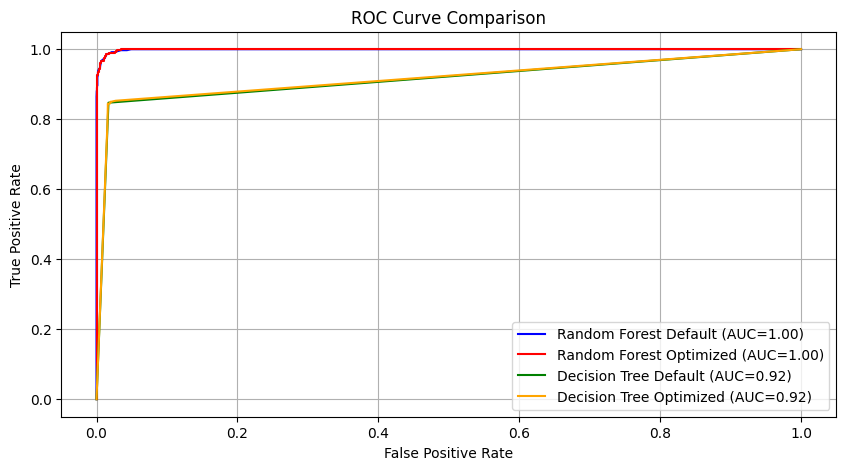

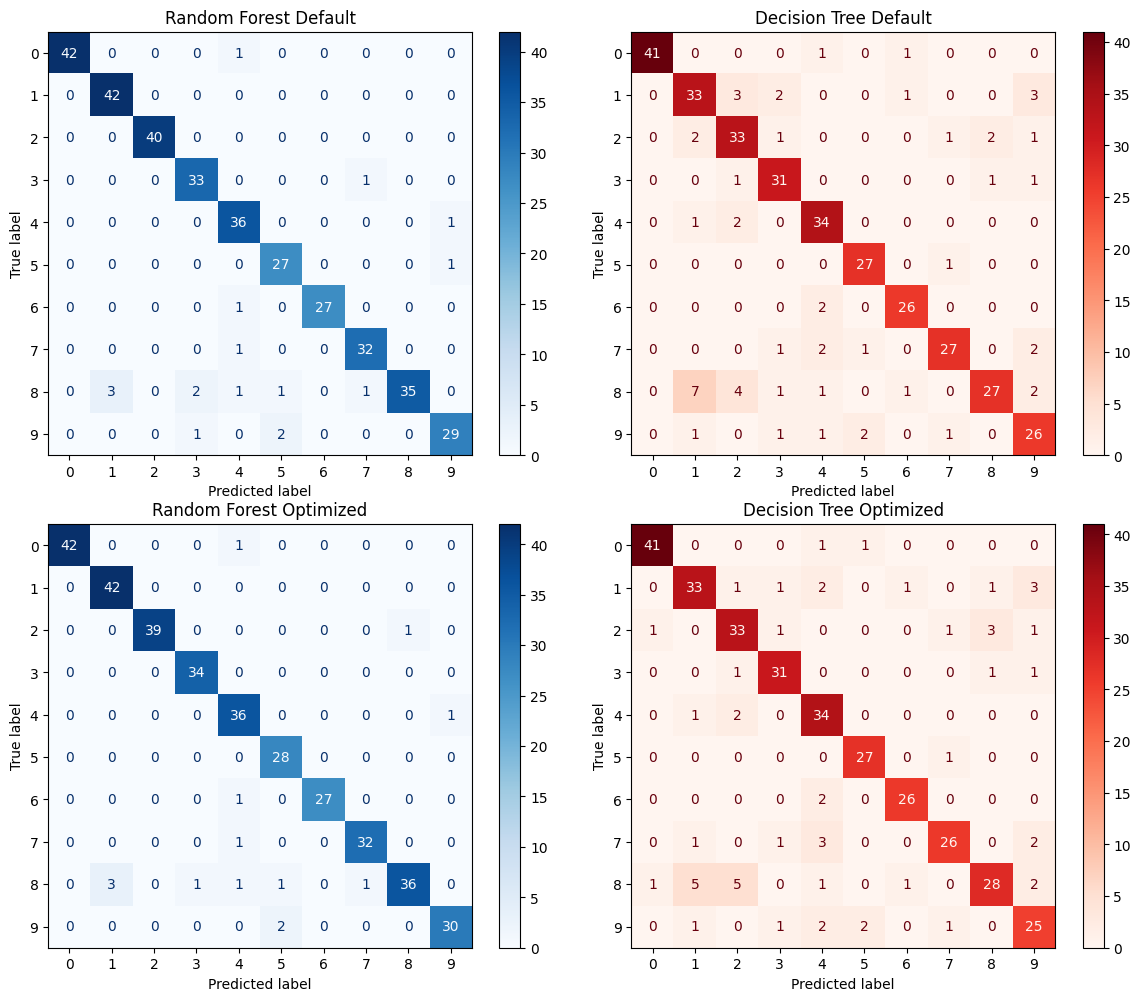

In [43]:
# Comparison between default and optimized models
def comparison_evaluation(model, X_test, y_test, y_test_bin):
    y_pred = model.predict(X_test)  # Predictions for balanced accuracy
    y_score = model.predict_proba(X_test)  # Probabilities for ROC AUC
    bacc = balanced_accuracy_score(y_test, y_pred)  # Balanced accuracy
    roc_auc = roc_auc_score(y_test_bin, y_score, multi_class='ovr', average='macro')  # ROC AUC (macro-averaged)
    return bacc, roc_auc, y_pred, y_score

# Default model evaluations
rfD_bacc, rfD_roc_auc, rfD_y_pred, rfD_y_score = comparison_evaluation(rfD, x_test, y_test, y_test_bin)
dtD_bacc, dtD_roc_auc, dtD_y_pred, dtD_y_score = comparison_evaluation(dtD, x_test, y_test, y_test_bin)
# Optimized model evaluations
rfH_bacc, rfH_roc_auc, rfH_y_pred, rfH_y_score = comparison_evaluation(rfBest, x_test, y_test, y_test_bin)
dtH_bacc, dtH_roc_auc, dtH_y_pred, dtH_y_score = comparison_evaluation(dtBest, x_test, y_test, y_test_bin)

# Printing results
print("Default Model Results.........................")
print(f"Random Forest - Balanced Accuracy: {rfD_bacc:.2f}, ROC AUC: {rfD_roc_auc:.2f}")
print(f"Decision Tree - Balanced Accuracy: {dtD_bacc:.2f}, ROC AUC: {dtD_roc_auc:.2f}")

print("\nOptimized Model Results.........................")
print(f"Random Forest - Balanced Accuracy: {rfH_bacc:.2f}, ROC AUC: {rfH_roc_auc:.2f}")
print(f"Decision Tree - Balanced Accuracy: {dtH_bacc:.2f}, ROC AUC: {dtH_roc_auc:.2f}")

# Plotting ROC curves
plt.figure(figsize=(10, 5))
#comparing False positive and true positive for Default
fpr_rfD, tpr_rfD, _ = roc_curve(y_test_bin.ravel(), rfD_y_score.ravel())
fpr_dtD, tpr_dtD, _ = roc_curve(y_test_bin.ravel(), dtD_y_score.ravel())
#comparing fpr anf tpr for Hypertuned Model
fpr_rfH, tpr_rfH, _ = roc_curve(y_test_bin.ravel(), rfH_y_score.ravel())
fpr_dtH, tpr_dtH, _ = roc_curve(y_test_bin.ravel(), dtH_y_score.ravel())
#plotting graph
plt.plot(fpr_rfD, tpr_rfD, label=f"Random Forest Default (AUC={rfD_roc_auc:.2f})", color="blue")
plt.plot(fpr_rfH, tpr_rfH, label=f"Random Forest Optimized (AUC={rfH_roc_auc:.2f})", color="red")
plt.plot(fpr_dtD, tpr_dtD, label=f"Decision Tree Default (AUC={dtD_roc_auc:.2f})", color="green")
plt.plot(fpr_dtH, tpr_dtH, label=f"Decision Tree Optimized (AUC={dtH_roc_auc:.2f})", color="orange")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.grid()
plt.show()

# Plotting confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

cm_rfD = confusion_matrix(y_test, rfD_y_pred)
cm_dtD = confusion_matrix(y_test, dtD_y_pred)
cm_rfH = confusion_matrix(y_test, rfH_y_pred)
cm_dtH = confusion_matrix(y_test, dtH_y_pred)

ConfusionMatrixDisplay(cm_rfD, display_labels=digits.target_names).plot(ax=axes[0, 0], cmap='Blues')
axes[0, 0].set_title("Random Forest Default")

ConfusionMatrixDisplay(cm_dtD, display_labels=digits.target_names).plot(ax=axes[0, 1], cmap='Reds')
axes[0, 1].set_title("Decision Tree Default")

ConfusionMatrixDisplay(cm_rfH, display_labels=digits.target_names).plot(ax=axes[1, 0], cmap='Blues')
axes[1, 0].set_title("Random Forest Optimized")

ConfusionMatrixDisplay(cm_dtH, display_labels=digits.target_names).plot(ax=axes[1, 1], cmap='Reds')
axes[1, 1].set_title("Decision Tree Optimized")

plt.tight_layout()
plt.show()


**References**

https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

https://scikit-learn.org/stable/modules/tree.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.balanced_accuracy_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_auc_score.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html

https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html

https://matplotlib.org/stable/gallery/text_labels_and_annotations/titles_demo.html#sphx-glr-gallery-text-labels-and-annotations-titles-demo-py

https://matplotlib.org/stable/tutorials/pyplot.html#sphx-glr-tutorials-pyplot-py

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html

https://stackoverflow.com/questions/35572000/how-can-i-plot-a-confusion-matrix

https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea

https://sklearn-evaluation.ploomber.io/en/latest/classification/compare.html

https://sklearn-evaluation.ploomber.io/en/latest/classification/optimization.html

https://sklearn-evaluation.ploomber.io/en/latest/classification/basic.html

Used Google Colab AI for fixing errors in syntax and use the Intellisense.